In [5]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

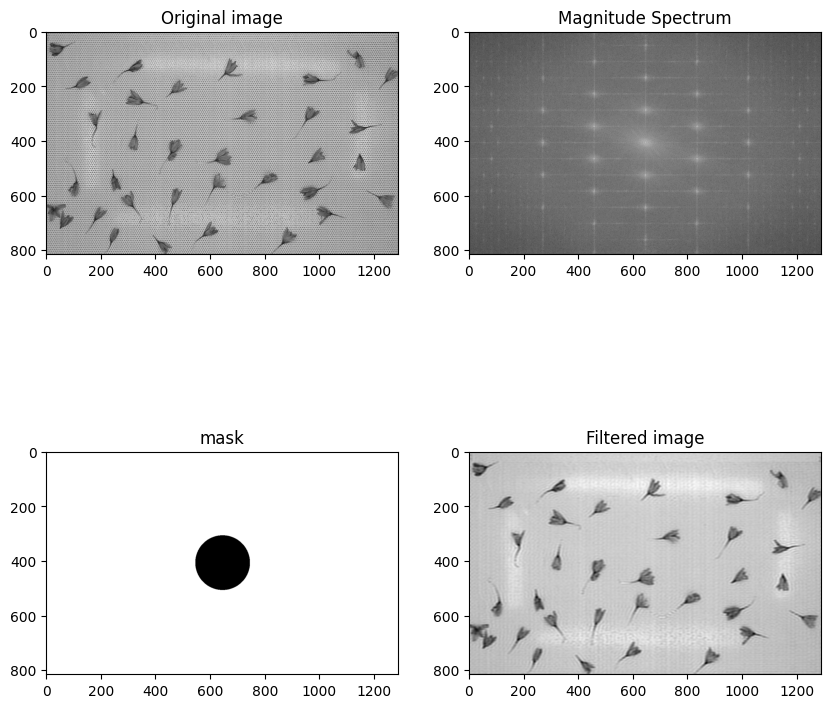

In [12]:
#read image
img = cv2.imread('saffrun.jpg',0)

#show image
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img, cmap = 'gray')
plt.title('Original image')

#compute the 2D FFT
# we use fft2 because we have 2D image
# then we shift the zero-frequency component to the center of the spectrum
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

#show the magnitude spectrum
#we calculate the magnitude spectrum by taking the absolute value of the complex numbers and then taking the log of the result
#we use 20*np.log because the values are too small
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(2,2,2)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')

#create circular mask with radius 100
#we use the center of the image as the center of the circle and initialize the mask with 1
#then we create a mask_area which is a boolean array that is true for the pixels inside the circle
#we set the mask to 0 for the pixels inside the circle
#we apply the mask by multiplying the shifted fft with the mask
rows, cols = img.shape
crow,ccol = rows/2 , cols/2
mask = np.zeros((rows,cols), np.uint8)
mask[:,:] = 1
r = 100
center = [crow,ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0])**2 + (y-center[1])**2 <= r*r
mask[mask_area] = 0

#show mask
plt.subplot(2,2,3)
plt.imshow(mask, cmap = 'gray')
plt.title('mask')

#apply mask and inverse DFT
fshift = fshift*(1-mask)
f_ishift = np.fft.ifftshift(fshift)
filtered_image = np.fft.ifft2(f_ishift)
filtered_image = np.abs(filtered_image)

#show result
plt.subplot(2,2,4)
plt.imshow(filtered_image, cmap = 'gray')
plt.title('Filtered image')
plt.show()

Text(0.5, 1.0, 'Canny Edge Detection')

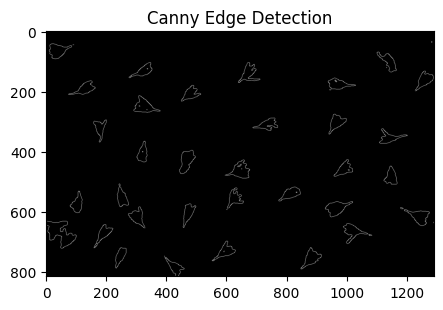

In [13]:
#using canny edge detector to detect object in the image
#we use a treshold of 127 to binarize the image and then apply the canny edge detector
treshold = 127
filtered_image[filtered_image<treshold] = 0
filtered_image[filtered_image>=treshold] = 255

#cv2.canny is a function that applies the canny edge detector
#it has 3 parameters: the image, the lower treshold and the upper treshold
#the lower treshold is used to detect weak edges and the upper treshold is used to detect strong edges

edges = cv2.Canny(filtered_image.astype(np.uint8),50,90)

f, ax = plt.subplots(figsize=(5,5))
ax.imshow(edges,cmap = "gray")
ax.set_title('Canny Edge Detection')

Text(0.5, 1.0, 'Direction')

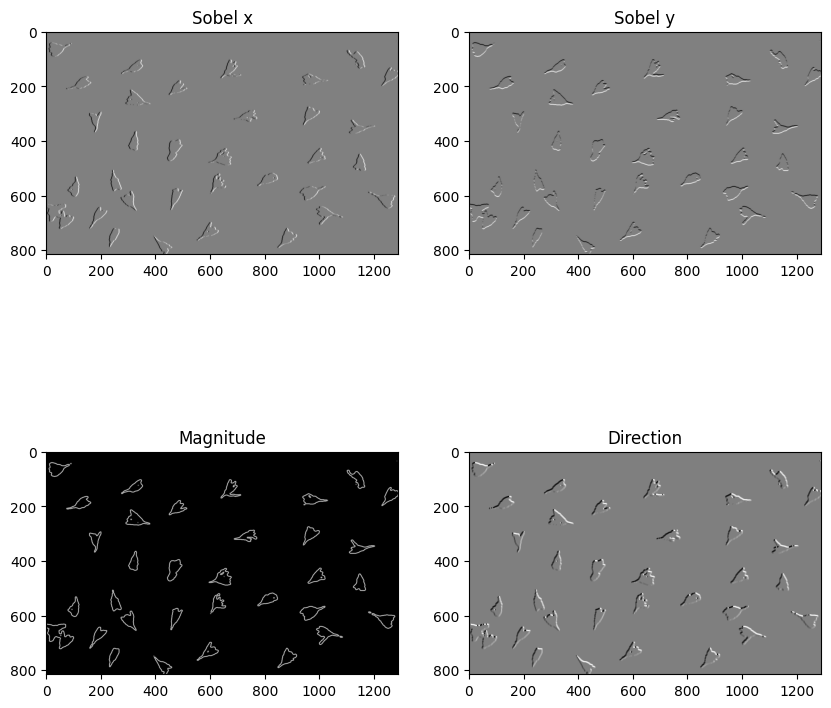

In [14]:
#calculate gradient magnitude and direction
#we use cv2.Sobel to calculate the gradient magnitude and direction
#it has 5 parameters:
#the image, the data type, the order of the derivative in x direction, the order of the derivative in y direction and the size of the kernel
sobel_x = cv2.Sobel(filtered_image,cv2.CV_64F,1,0, ksize=5)
sobel_y = cv2.Sobel(filtered_image,cv2.CV_64F,0,1, ksize=5)

#we use cv2.cartToPolar to calculate the magnitude and direction of the gradient
#it has 2 parameters: the gradient in x direction and the gradient in y direction
mag , phase = cv2.cartToPolar(sobel_x,sobel_y)

#we use np.arctan2 to calculate the direction of the gradient
#it has 2 parameters: the gradient in x direction and the gradient in y direction
direction = np.arctan2(sobel_x,sobel_y)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(sobel_x, cmap = 'gray')
plt.title('Sobel x')

plt.subplot(2,2,2)
plt.imshow(sobel_y, cmap = 'gray')
plt.title('Sobel y')

plt.subplot(2,2,3)
plt.imshow(mag, cmap = 'gray')
plt.title('Magnitude')

plt.subplot(2,2,4)
plt.imshow(direction, cmap = 'gray')
plt.title('Direction')
